# KDDCup99网络入侵检测数据集介绍

该数据集是从一个模拟的美国空军局域网上采集来的9个星期的网络连接数据,分成具有标识的训练数据和未加标识的测试数据。测试数据和训练数据有着不同的概率分布,测试数据包含了一些未出现在训练数据中的攻击类型,这使得入侵检测更具有现实性。
在训练数据集中包含了1种正常的标识类型normal和22种训练攻击类型,如表1-1所示。另外有14种攻击仅出现在测试数据集中。

衡量距离的选择

高维度对距离衡量的影响：众所周知当变量数越多，欧式距离的区分能力就越差。
变量值域对距离的影响：值域越大的变量常常会在距离计算中占据主导作用，因此应先对变进行标准化。

K值的设定
k太小，分类结果易受噪声点影响；k太大，近邻中又可能包含太多的其它类别的点。（对距离加权，可以降低k值设定的影响）
k值通常是采用交叉检验来确定（以k=1为基准）
经验规则：k一般低于训练样本数的平方根

In [ ]:

def edit_distance(word1, word2):
    len1 = len(word1)
    len2 = len(word2)
    dp = np.zeros((len1 + 1,len2 + 1))
    for i in range(len1 + 1):
        dp[i][0] = i    
    for j in range(len2 + 1):
        dp[0][j] = j
     
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            delta = 0 if word1[i-1] == word2[j-1] else 1
            dp[i][j] = min(dp[i - 1][j - 1] + delta, min(dp[i-1][j] + 1, dp[i][j - 1] + 1))
    return dp[len1][len2]
edit_distance("jarrry", "jerr")

In [ ]:

#kdd99数据集预处理
#将kdd99符号型数据转化为数值型数据
 
#coding:utf-8
 
import numpy as np
import pandas as pd
import csv
import time
global label_list  #label_list为全局变量
def edit_distance(word1, word2):
    len1 = len(word1)
    len2 = len(word2)
    dp = np.zeros((len1 + 1,len2 + 1))
    for i in range(len1 + 1):
        dp[i][0] = i    
    for j in range(len2 + 1):
        dp[0][j] = j
     
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            delta = 0 if word1[i-1] == word2[j-1] else 1
            dp[i][j] = min(dp[i - 1][j - 1] + delta, min(dp[i-1][j] + 1, dp[i][j - 1] + 1))
    return dp[len1][len2]
#定义kdd99数据预处理函数
def preHandel_data():
    source_file='kddcup.data_10_percent_corrected'
    handled_file='kddcup.data_10_percent_corrected.csv'
    data_file=open(handled_file,'w',newline='')     #python3.x中添加newline=''这一参数使写入的文件没有多余的空行
    with open(source_file,'r') as data_source:
        csv_reader=csv.reader(data_source)
        csv_writer=csv.writer(data_file)
        count=0   #记录数据的行数，初始化为0
        for row in csv_reader:
            temp_line=np.array(row)   #将每行数据存入temp_line数组里
            temp_line[1]=handleProtocol(row)   #将源文件行中3种协议类型转换成数字标识
            temp_line[2]=handleService(row)    #将源文件行中70种网络服务类型转换成数字标识
            temp_line[3]=handleFlag(row)       #将源文件行中11种网络连接状态转换成数字标识
            temp_line[41]=handleLabel(row)   #将源文件行中23种攻击类型转换成数字标识
            csv_writer.writerow(temp_line)
            count+=1
            #输出每行数据中所修改后的状态
            print(count,'status:',temp_line[1],temp_line[2],temp_line[3],temp_line[41])
        data_file.close()
 
 
#将相应的非数字类型转换为数字标识即符号型数据转化为数值型数据
def find_index(x,y):
    return [i for i in range(len(y)) if y[i]==x]
 
#定义将源文件行中3种协议类型转换成数字标识的函数
def handleProtocol(input):
    protocol_list=['tcp','udp','icmp']

    if input[1] in protocol_list:
        return find_index(input[1],protocol_list)[0]
 
#定义将源文件行中70种网络服务类型转换成数字标识的函数
def handleService(input):
   service_list=['aol','auth','bgp','courier','csnet_ns','ctf','daytime','discard','domain','domain_u',
                 'echo','eco_i','ecr_i','efs','exec','finger','ftp','ftp_data','gopher','harvest','hostnames',
                 'http','http_2784','http_443','http_8001','imap4','IRC','iso_tsap','klogin','kshell','ldap',
                 'link','login','mtp','name','netbios_dgm','netbios_ns','netbios_ssn','netstat','nnsp','nntp',
                 'ntp_u','other','pm_dump','pop_2','pop_3','printer','private','red_i','remote_job','rje','shell',
                 'smtp','sql_net','ssh','sunrpc','supdup','systat','telnet','tftp_u','tim_i','time','urh_i','urp_i',
                 'uucp','uucp_path','vmnet','whois','X11','Z39_50']
   if input[2] in service_list:
       return find_index(input[2],service_list)[0]
 
#定义将源文件行中11种网络连接状态转换成数字标识的函数
def handleFlag(input):
    flag_list=['OTH','REJ','RSTO','RSTOS0','RSTR','S0','S1','S2','S3','SF','SH']
    if input[3] in flag_list:
        return find_index(input[3],flag_list)[0]
 
#定义将源文件行中攻击类型转换成数字标识的函数(训练集中共出现了22个攻击类型，而剩下的17种只在测试集中出现)
def handleLabel(input):
    #label_list=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.',
    # 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.',
    # 'back.', 'imap.', 'satan.', 'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
    # 'spy.', 'rootkit.']
    global label_list  #在函数内部使用全局变量并修改它
    if input[41] in label_list:
        return find_index(input[41],label_list)[0]
    else:
        label_list.append(input[41])
        return find_index(input[41],label_list)[0]
 
if __name__=='__main__':
    start_time=time.clock()
    global label_list   #声明一个全局变量的列表并初始化为空
    label_list=[]
    preHandel_data()
    end_time=time.clock()
    print("Running time:",(end_time-start_time))  #输出程序运行时间

缺失值处理：

In [ ]:
def del_nul():
    source_file='kddcup.data_10_percent_corrected'
    handled_file='kddcup.data_10_percent_corrected1.csv'
    data_file=open(handled_file,'w',newline='')     #python3.x中添加newline=''这一参数使写入的文件没有多余的空行
    with open(source_file,'r') as data_source:
        csv_reader=csv.reader(data_source)
        csv_writer=csv.writer(data_file)
        count=0   #记录数据的行数，初始化为0
        for row in csv_reader:
            row=np.array(row)
            flag=0
            for col in row:
                if len(col) ==0:
                    flag=1
                    break
            if flag:
                continue
            csv_writer.writerow(row)
            
            count+=1
            #输出每行数据中所修改后的状态
        print(count)
        data_file.close()
del_nul()#无缺失值，除了删除缺失值，还可以进行拉格朗日插值

可进行命名实体识别来观察是否有相同的列名或者同义，或者根据相关系数进行降维。

In [ ]:
import matplotlib.pyplot as plt
def edit_distance(word1, word2):#计算服务字段的各个类型编辑距离，聚类再编号
    len1 = len(word1)
    len2 = len(word2)
    dp = np.zeros((len1 + 1,len2 + 1))
    for i in range(len1 + 1):
        dp[i][0] = i    
    for j in range(len2 + 1):
        dp[0][j] = j
     
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            delta = 0 if word1[i-1] == word2[j-1] else 1
            dp[i][j] = min(dp[i - 1][j - 1] + delta, min(dp[i-1][j] + 1, dp[i][j - 1] + 1))
    return dp[len1][len2]
def edit_distance_list(lis):
    res=len(lis)
    mat=[[0]*res]*res
    for i in range(res):
        for j in range(res):
            mat[i][j]=edit_distance(lis[i],lis[j])
    return mat
service_list =['aol','auth','bgp','courier','csnet_ns','ctf','daytime','discard','domain','domain_u',
                 'echo','eco_i','ecr_i','efs','exec','finger','ftp','ftp_data','gopher','harvest','hostnames',
                 'http','http_2784','http_443','http_8001','imap4','IRC','iso_tsap','klogin','kshell','ldap',
                 'link','login','mtp','name','netbios_dgm','netbios_ns','netbios_ssn','netstat','nnsp','nntp',
                 'ntp_u','other','pm_dump','pop_2','pop_3','printer','private','red_i','remote_job','rje','shell',
                 'smtp','sql_net','ssh','sunrpc','supdup','systat','telnet','tftp_u','tim_i','time','urh_i','urp_i',
                 'uucp','uucp_path','vmnet','whois','X11','Z39_50']
mat=edit_distance_list(service_list)
print(np.shape(mat))
%matplotlib tk
import seaborn as sns
plt.subplots(figsize=(100,100))
sns.heatmap(mat, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()

In [ ]:
# import editdistance
def edit_distance(word1, word2):#计算服务字段的各个类型编辑距离，聚类再编号
    len1 = len(word1)
    len2 = len(word2)
    dp = np.zeros((len1 + 1,len2 + 1))
    for i in range(len1 + 1):
        dp[i][0] = i    
    for j in range(len2 + 1):
        dp[0][j] = j
     
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            delta = 0 if word1[i-1] == word2[j-1] else 1
            dp[i][j] = min(dp[i - 1][j - 1] + delta, min(dp[i-1][j] + 1, dp[i][j - 1] + 1))
    return dp[len1][len2]
def editdance_cluster(text_lists, thred=1):
    clusters = []
    for text in text_lists:
        flag = False
        for cluster in clusters:
            for _text in cluster:
                if edit_distance(text, _text)<=thred:
                    cluster.add(text)
                    flag=True
                    break
            if flag:
                break
        if not flag:
            clusters.append({text})
    
    valid_clusters = [i for i in clusters if len(i)>1]
    print('total clusters:{}, valid clusters:{}'.format(len(clusters), len(valid_clusters)))
    return valid_clusters

if __name__=="__main__":
    
    text_lists= ['粤A12345', '粤A12045', '粤A12046', '粤A0']
    print('bigin cluster...')
    valid_clusters=editdance_cluster(text_lists)
    print(valid_clusters[:10])

考虑即使把它分为几类，但那几类的标签还是连续的，无法解释其中距离远近，最重要的是调整顺序后，可能会出现不同的函数形式。除非用onehot编码，这样的话，相当于把极近的设为1类，用同一个编码，实际上还是onehot。如果以一个为准，两两相距的距离为编辑距离，但是不一定在一维上或者二维，无法确定准确位置即编码，重点体现出编辑距离，又作为编码的形式。

不如直接把字母转为数字，一个单词就各字母代表的数字求和，但是没有考虑到顺序带来的影响，对于有先后顺序的往往都要RNN。所以效果也不好。就还是onehot编码。

In [ ]:

flag_list=['OTH','REJ','RSTO','RSTOS0','RSTR','S0','S1','S2','S3','SF','SH']
service_list =['aol','auth','bgp','courier','csnet_ns','ctf','daytime','discard','domain','domain_u',
             'echo','eco_i','ecr_i','efs','exec','finger','ftp','ftp_data','gopher','harvest','hostnames',
             'http','http_2784','http_443','http_8001','imap4','IRC','iso_tsap','klogin','kshell','ldap',
             'link','login','mtp','name','netbios_dgm','netbios_ns','netbios_ssn','netstat','nnsp','nntp',
             'ntp_u','other','pm_dump','pop_2','pop_3','printer','private','red_i','remote_job','rje','shell',
             'smtp','sql_net','ssh','sunrpc','supdup','systat','telnet','tftp_u','tim_i','time','urh_i','urp_i',
             'uucp','uucp_path','vmnet','whois','X11','Z39_50']
protocol_list=['tcp','udp','icmp']
label_list=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.',
            'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.',
            'back.', 'imap.', 'satan.', 'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
            'spy.', 'rootkit.']
def find_index(x,y):
    return [i for i in range(len(y)) if y[i]==x]
def one_hot(i,total):
    res=[0]*total
    res[i]=1
    return res
def handleProtocol(input):
    if input[1] in protocol_list:
        return one_hot(find_index(input[1],protocol_list)[0],3)
def handleService(input):
    if input[2] in service_list:
        return one_hot(find_index(input[2],service_list)[0],70)
def handleFlag(input):
    if input[3] in flag_list:
        return one_hot(find_index(input[3],flag_list)[0],11)
# def handleLabel(input):
#     if input[41] in label_list:
#         return one_hot(find_index(input[41],label_list)[0],23)
source_file='kddcup.data_10_percent_corrected1.csv'
handled_file='kddcup.data_10_percent_corrected2.csv'
data_file=open(handled_file,'w',newline='')
with open(source_file,'r') as data_source:
        csv_reader=csv.reader(data_source)
        csv_writer=csv.writer(data_file)
        count=0   #记录数据的行数，初始化为0
        for row in csv_reader:
#                 temp_line=np.array(row)   #将每行数据存入temp_line数组里
            temp_line=[]
            temp_line.append(row[0])
            temp_line.extend(handleProtocol(row))   #将源文件行中3种协议类型转换成数字标识
            temp_line.extend(handleService(row))    #将源文件行中70种网络服务类型转换成数字标识
            temp_line.extend(handleFlag(row))       #将源文件行中11种网络连接状态转换成数字标识
            temp_line.extend(row[4:41])
            tmp=find_index(row[41],label_list)[0]
            temp_line.append(tmp!=0)   #将源文件行中23种攻击类型转换成数字标识
            csv_writer.writerow(temp_line)
            count+=1
            #输出每行数据中所修改后的状态
#                 print(count,'status:',temp_line[1],temp_line[2],temp_line[3],temp_line[41])
            #输出每行数据中所修改后的状态
        print(count)
        data_file.close()

In [ ]:
data=pd.read_csv('kddcup.data_10_percent_corrected2.csv')
train_part=[:,[:-1]]
test_part=data[:,[-1]]
(data-data.mean())/(data.std())
data.to_csv('kddcup.data_10_percent_corrected3.csv')

In [ ]:
分析数据：

对于字符串的编码不应直接按从1开始编码，而是根据内在相关性，要么就是直接onehot编码，但会产生稀疏矩阵，可以通过只存储非0元素，也可以转置运算等。

如果是onehot编码就是互不相关，并不太好。一般系数矩阵通过余弦相似度进行降维。

在主成分分析（PCA）原理总结中，我们对降维算法PCA做了总结。这里我们就对另外一种经典的降维方法线性判别分析（Linear Discriminant Analysis, 以下简称LDA）做一个总结。LDA在模式识别领域（比如人脸识别，舰艇识别等图形图像识别领域）中有非常广泛的应用，因此我们有必要了解下它的算法原理。

　　　　在学习LDA之前，有必要将其自然语言处理领域的LDA区别开来，在自然语言处理领域， LDA是隐含狄利克雷分布（Latent Dirichlet Allocation，简称LDA），他是一种处理文档的主题模型。我们本文只讨论线性判别分析，因此后面所有的LDA均指线性判别分析。

LDA，线性判别分析：https://www.cnblogs.com/pinard/p/6244265.html

PCA依靠方差，LDA依靠均值。PCA：https://blog.csdn.net/program_developer/article/details/80632779

文本相似度计算：https://blog.csdn.net/qq_28031525/article/details/79596376

# 文本编码分类

In [ ]:
from jieba import cut
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

"""语料"""
texts = [
    '三个只有一个是新鲜的，其它两个都坏了，买得最差的一次水果',
    '京东，才发现你是个骗子，服务更是一样的烂',
    '火龙果很小，而且还有一个烂了，发霉了',
    '物流慢，收到时有两个底部已开始腐烂',
    '屏幕清晰度不高，而且运行速度巨慢',
    '贝质量很好，款式时尚，大小合适，做工精致，穿着舒服，服务很好',
    '质量很好的，款式也不错，看起来高档大气，卖家服务还好，不错',
    '裤子收到了，质量不错，价格便宜，穿着舒服，下次我还会来买的',
    '宝贝收到了，试了一下，穿上挺舒服的，是正品，综合给好评',
    '裤子挺好看，质量也不错，老公搭配衣服挺好看也很喜欢穿',
]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

"""向量转换器"""
vectorizer = TfidfVectorizer(tokenizer=cut, stop_words=set('的在了是和也有为就都说等与才这，'))
X = vectorizer.fit_transform(texts)

"""分类模型"""
clf = LogisticRegression()
clf.fit(X, y)
print(clf.score(X, y))

In [ ]:
print(X)

In [ ]:
from jieba import cut
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')


def get_data():
    y, x, xh, xb = [], [], [], []
    with open('policy.txt', encoding='utf-8') as f:
        for rows in f.read().strip().split('\n\n'):
            label, head, body = rows.split('\n', 2)
            y.append(label)
            x.append(head + '\n' + body)
            xh.append(head)
            xb.append(body)
    return y, x, xh, xb


def cut1(text):
    """cut1"""
    for word in cut(text):
        if word.strip():
            yield word.strip()


def cut2(line):
    """cut2"""
    head, body = line.split('\n', 1)
    for word in cut1(head):
        yield word + 'H'
    for word in cut1(body):
        yield word + 'B'


def clf_text(name, x, y, tokenizer=cut1):
    # 数据切分
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)
    # 向量化
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, min_df=2)
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    # 建模
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    print(name, tokenizer.__doc__, clf.score(x_test, y_test))


_y, _x, _xh, _xb = get_data()
clf_text('head', _xh, _y)
clf_text('body', _xb, _y)
clf_text('h++b', _x, _y)
clf_text('h++b', _x, _y, cut2)


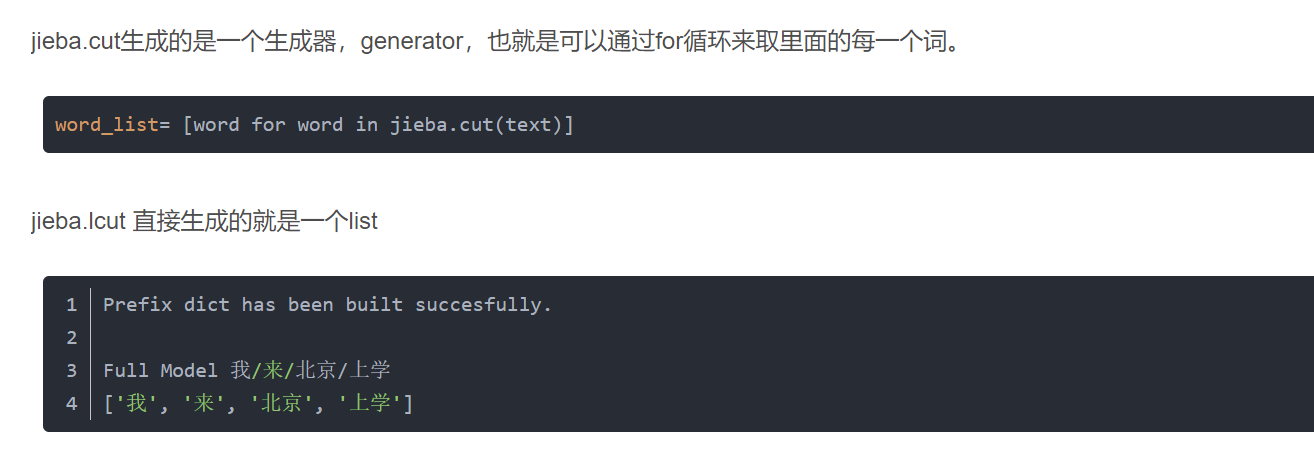

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['air air ball call', 'air ball ball', 'air air air']
vectorizer = CountVectorizer()  # 创建文本向量转换器
vectorizer.fit(corpus)  # 训练
X = vectorizer.transform(corpus)  # 转换
print(X, type(X), X[0], type(X[0]), sep='\n')

In [ ]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
# 语料
texts = ['小米苹果华为小米', '苹果小米苹果', '小米小米']
# 向量化
vectorizer = TfidfVectorizer(tokenizer=jieba.cut)
X = vectorizer.fit_transform(texts)
print(X)
print(X.toarray())

In [ ]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
# 语料
texts = ['小米、小米、苹果、华为', '小米和苹果、1+和苹果', '华为和小米']
# 分词器
jieba.add_word('1+', 2, 'nz')
tokenizer = lambda s: jieba.cut(s, HMM=False)#不适用HMM
# 停词
stop_words = {'、', '和', '的'}
# 向量化
vectorizer = CountVectorizer(tokenizer=tokenizer, stop_words=stop_words, max_features=3)
X = vectorizer.fit_transform(texts)
print(X)
print(list(tokenizer('小米华为苹果1+')))
print(vectorizer.transform(['小米、华为、苹果和1+']))

In [ ]:
from numpy import array
from scipy.sparse import csr_matrix, csc_matrix
a = array([[0, 0, -2, 0],
           [-1, 0, 3, 0],
           [0, 0, 0, -9]])
csr = csr_matrix(a)
csc = csc_matrix(a)
print(a, csr, type(csr), csc, type(csc), csc.toarray(), sep='\n\n')

In [ ]:
from collections import Counter
from jieba import cut
texts = ['酸奶蛋糕', '酸奶芝士', '芝士酸奶']
counter = Counter(word for text in texts for word in cut(text))
print(counter)
word2id = {c[0]: i for i, c in enumerate(counter.most_common())}#按出现次数排序
print(word2id)

In [ ]:
#onehot
length = len(word2id)
for word, wid in word2id.items():
    vector = [0] * length
    vector[wid] = 1
    print(word, vector)

# 共现矩阵和SVD

In [ ]:
# 编造文本、分词
from jieba import lcut
sentences = ['我吴彦祖', '我张学友', '吴彦祖我', '张学友我刘德华吴彦祖',
             '酸奶芝士', '芝士酸奶', '芝士蛋糕', '酸奶芝士蛋糕']
ls_of_words = [lcut(sentence) for sentence in sentences]

# 生成字典和词ID
from gensim.corpora import Dictionary
dt = Dictionary(ls_of_words).token2id
ls_of_wids = [[dt[word] for word in words] for words in ls_of_words]

# 共现矩阵#体现两个词之间的关系，矩阵形式
import numpy as np
dimension = len(dt)  # 维数
matrix = np.matrix([[0] * dimension] * dimension)
def co_occurrence_matrix(ls):
    length = len(ls)
    for i in range(length):
        for j in range(length):
            if i != j:
                matrix[[ls[i]], [ls[j]]] += 1
for ls in ls_of_wids:
    co_occurrence_matrix(ls)
print(matrix)

# 奇异值分解（Singular Value Decomposition）
U, s, Vh = np.linalg.svd(matrix, full_matrices=False)#full_matrices的取值是为0或者1，默认值为1，这时u的大小为(M,M)，v的大小为(N,N) 。否则u的大小为(M,K)，v的大小为(K,N) ，K=min(M,N)。

# 聚类
X = -U[:, 0:2]
from sklearn.cluster import KMeans
labels = KMeans(n_clusters=2).fit(X).labels_
colors = ('y', 'g')

# 可视化
import matplotlib.pyplot as mp
mp.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
for word in dt.keys():
    i = dt[word]
    mp.scatter(X[i, 1], X[i, 0], c=colors[labels[i]], s=400, alpha=0.4)
    mp.text(X[i, 1], X[i, 0], word, ha='center', va='center')
mp.show()


以上来源于：https://blog.csdn.net/Yellow_python/article/details/97677183


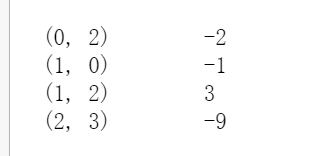词袋法不考虑顺序，考虑频率。以上是稀疏矩阵只表示了非0元素的方法。

使用map将有大小关系的离散量直接映射到数值：

In [ ]:
import pandas as pd   
df = pd.DataFrame([    
            ['green', 'M', 10.1, 'label1'],     
            ['red', 'L', 13.5, 'label2'],     
            ['blue', 'XL', 15.3, 'label2']])    
# color、label不具备大小含义，size具有大小意义  
df.columns = ['color', 'size', 'length', 'label']
size_mapping = {    
           'XL': 3,    
           'L': 2,    
           'M': 1}    
df['size'] = df['size'].map(size_mapping)    

In [ ]:
print(df)